# Salary Aanalysis
## How well do jobs and skills pay for Data Analysts ?
### Methodology
1) Evaluate median salary for top 6 data jobs
2) Find median salary per skill for Data Analysts
3) Visualize for highest paying skills and most demanded skills 

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv('data_jobs_dataset.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'],dayfirst=True)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df.head()

,Unnamed: 0,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:00,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:00,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:00,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:00,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:00,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_location               1045
job_via                       8
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_rate              752674
salary_year_avg          763738
salary_hour_avg          775079
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [4]:
df.drop(columns=['job_location','job_via','salary_rate','salary_hour_avg'],inplace=True)

In [5]:
df.columns

Index(['Unnamed: 0', 'job_title_short', 'job_title', 'job_schedule_type',
       'job_work_from_home', 'search_location', 'job_posted_date',
       'job_no_degree_mention', 'job_health_insurance', 'job_country',
       'salary_year_avg', 'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_year_avg          763738
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [7]:
df = df.dropna(subset=['salary_year_avg'])

In [8]:
job_titles = df['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [9]:
df_top6 = df[df['job_title_short'].isin(job_titles)] 

In [10]:
job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

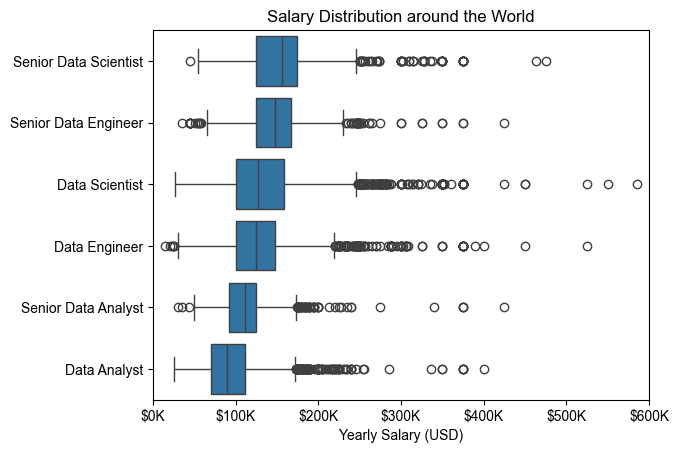

In [11]:
sns.boxplot(data=df_top6, x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary Distribution around the World')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary VS Skill for Data Analysts

In [12]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA = df_DA.dropna(subset=['salary_year_avg'])

df_DA = df_DA.explode('job_skills')

df_DA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Determine The Highest Paid Skills and Most Demanded Skills

In [13]:
df_DA_top_pay = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
svn,1,400000.0
solidity,1,179000.0
dplyr,3,167500.0
gitlab,7,163782.0
terraform,3,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0


In [14]:
df_DA_skills = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1838,98500.0
tableau,1657,95000.0
r,1073,92527.5
sql,3079,92500.0
sql server,336,92150.0
power bi,1042,90000.0
sas,1006,90000.0
powerpoint,518,85000.0
excel,2135,84479.0


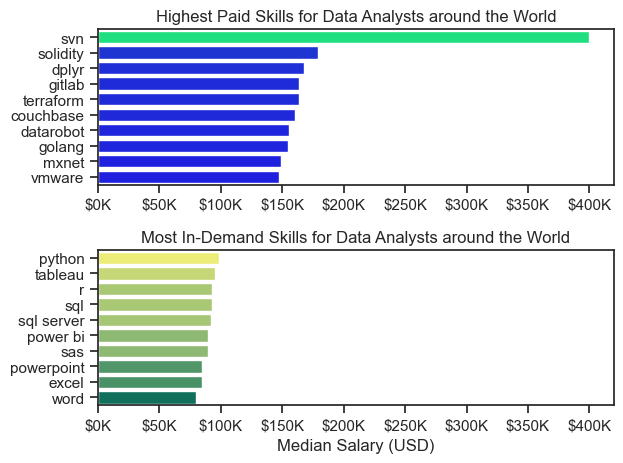

In [15]:
fig,ax = plt.subplots(2,1)

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0],palette='winter')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts around the World')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1],palette='summer')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts around the World')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()